# Plot benchmark results
This notebook reads metrics from `baseline_metrics` and produces barplot akin to those in the paper. **Note** that these results are based on the retrained checkpoints and **MatterSim** relaxation & energy (**not DFT**), so results may vary from those in the paper.

In [1]:
import seaborn as sns
import pandas as pd
import os
import json
from matplotlib import pyplot as plt

In [2]:
# Read all metrics dictionaries
all_data_dicts = []
for baseline in os.listdir("metrics"):
    if not baseline.endswith(".json"):
        continue
    with open(os.path.join("metrics", baseline)) as f:
        data = json.load(f)
    data = {
        k: v["value"] for k, v in data.items()
    }
    data["model"] = baseline.split(".")[0]
    all_data_dicts.append(data)

In [3]:
df = pd.DataFrame(all_data_dicts)

In [4]:
# Define display names for plotting
model_display_names = {
    "mattergen": "MatterGen\n$^{\\text{(Alex-MP)}}$",
    "mattergen_mp_20": "MatterGen\n$^{\\text{(MP)}}$",
    "g_schnet": "G-SchNet\n$^{\\text{(MP)}}$",
    "p_g_schnet": "P-G-SchNet\n$^{\\text{(MP)}}$",
    "cdvae": "CDVAE\n$^{\\text{(MP)}}$",
    "diffcsp_mp_20": "DiffCSP\n$^{\\text{(MP)}}$",
    "ftcp": "FTCP\n$^{\\text{(MP)}}$",
}

In [5]:
model_order = ["mattergen", "mattergen_mp_20", "diffcsp_mp_20", "cdvae", "g_schnet", "p_g_schnet", "ftcp"]
# reorder rows
df["model"] = pd.Categorical(df["model"], categories=model_order, ordered=True)
df["% S.U.N. Structures (MatterSim)"] = 100 * df["frac_novel_unique_stable_structures"]
df.model = df.model.cat.rename_categories(model_display_names)

In [6]:
TEAL = "#49c5b1"
PURPLE = "#8661c5"
GREY = "#d9d9d6"
colors = [TEAL, PURPLE, GREY, GREY, GREY, GREY, GREY]

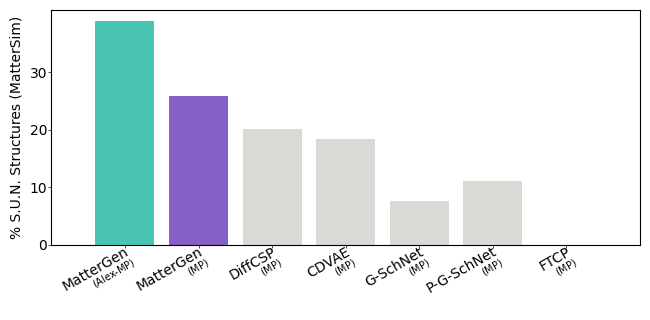

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(6.6, 3.3))
sns.barplot(
    data=df,
    x="model",
    hue="model",
    legend=False,
    y="% S.U.N. Structures (MatterSim)", 
    palette=colors,
    saturation=1
)
plt.xticks(rotation=30, ha="right")
plt.xlabel("")

x_tick_rotation = 30

locs, labels_out = plt.xticks(ha='right', rotation=x_tick_rotation,)
for l in labels_out:
    # manually draw labels so we can slightly adjust the x position
    x, y = l.get_position()
    plt.text(x=x + 0.2, y=y, s=l.get_text(), rotation=x_tick_rotation, ha="right", va="top")
ax = plt.gca()
# remove the originally drawn labels
ax.set_xticklabels([], minor=False)
ax.tick_params(axis='x', which='major', pad=-1, width=0.5, length=2)
ax.tick_params(axis='y', which='major', pad=1, width=0.5, length=2)
plt.xlim(-1.0, len(model_order))

plt.yticks([0.0, 10, 20, 30,])
plt.tight_layout()
plt.savefig("figures/metrics_sun.png", bbox_inches="tight")
plt.show()

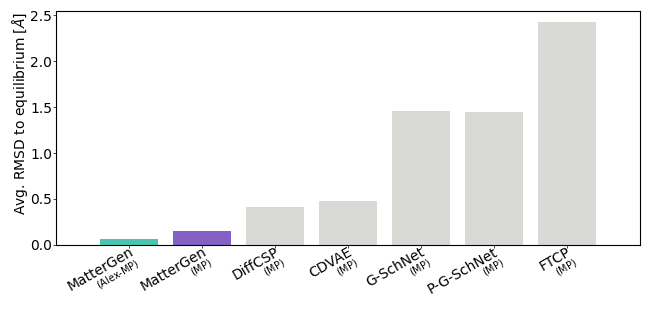

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6.6, 3.3))
sns.barplot(
    data=df,
    x="model",
    hue="model",
    legend=False,
    y="avg_rmsd_from_relaxation", 
    palette=colors,
    saturation=1
)
plt.xticks(rotation=30, ha="right")
plt.xlabel("")
plt.ylabel('Avg. RMSD to equilibrium [$\AA$]', labelpad=0, loc="top")

x_tick_rotation = 30

locs, labels_out = plt.xticks(ha='right', rotation=x_tick_rotation,)
for l in labels_out:
    # manually draw labels so we can slightly adjust the x position
    x, y = l.get_position()
    plt.text(x=x + 0.2, y=y, s=l.get_text(), rotation=x_tick_rotation, ha="right", va="top")
ax = plt.gca()
# remove the originally drawn labels
ax.set_xticklabels([], minor=False)
ax.tick_params(axis='x', which='major', pad=-1, width=0.5, length=2)
ax.tick_params(axis='y', which='major', pad=1, width=0.5, length=2)

plt.yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
plt.xlim(-1.0, len(model_order))

plt.tight_layout()
plt.savefig("figures/metrics_rmsd.png", bbox_inches="tight")
plt.show()